## Introduction
I am just trying to analysis about the data set of Seattle city in AirBnB. If I would like to be a owner of a accomodation. I would like to know what type of house I should have, what point I should take care about and how much price I should set for the acccmodation.

This Project analysises dataset of Seattle city close to Washington (US).

### Importing Packages required

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

reviews = pd.read_csv('./reviews.csv')
calendar = pd.read_csv('./calendar.csv')
listings = pd.read_csv('./listings.csv')

In [2]:
# Avoid overlapping areas
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15 
plt.tight_layout()

<Figure size 1080x1080 with 0 Axes>

We have imported numpy ,pandas for basic data analysis. Matplotlib and seaborn for data visualization.

### Loading csv files and working on them.

In [3]:
# Check the contents of the dataset.
reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [4]:
num_rows = reviews.shape[0] #Provide the number of rows in the dataset
num_cols = reviews.shape[1] #Provide the number of columns in the dataset

print(num_rows)
print(num_cols)

84849
6


In [5]:
# Check the information of the dataset.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [6]:
no_nulls = set(reviews.columns[reviews.isnull().mean()==0])#Provide a set of columns with 0 missing values.

print(no_nulls)

{'listing_id', 'id', 'reviewer_id', 'reviewer_name', 'date'}


#### ・Observing the reviews data 
The data in the comments of the deta set may help in the analysis, but I'm not sure yet.
<br>
<br>

In [7]:
# Check the contents of the dataset.
calendar.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [8]:
num_rows_2 = calendar.shape[0] #Provide the number of rows in the dataset
num_cols_2 = calendar.shape[1] #Provide the number of columns in the dataset

print(num_rows_2)
print(num_cols_2)

1393570
4


In [9]:
# Check the information of the dataset.
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [10]:
no_nulls_2 = set(calendar.columns[calendar.isnull().mean()==0])#Provide a set of columns with 0 missing values.

print(no_nulls_2)

{'listing_id', 'available', 'date'}


#### ・Observing the calendar data
The data in the price of the deta set may help in the analysis, but I'm not sure yet.
<br>
<br>

In [11]:
# Check the contents of the dataset.
listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [12]:
num_rows_3 = listings.shape[0] #Provide the number of rows in the dataset
num_cols_3 = listings.shape[1] #Provide the number of columns in the dataset

print(num_rows_3)
print(num_cols_3)

3818
92


In [13]:
# Check the information of the dataset.
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [14]:
# Avoid overlapping areas
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [15]:
no_nulls_3 = set(listings.columns[listings.isnull().mean()==0])#Provide a set of columns with 0 missing values.

print(no_nulls_3)

{'last_scraped', 'host_url', 'state', 'host_id', 'is_location_exact', 'latitude', 'street', 'smart_location', 'name', 'scrape_id', 'require_guest_profile_picture', 'has_availability', 'guests_included', 'cancellation_policy', 'room_type', 'availability_60', 'availability_365', 'minimum_nights', 'listing_url', 'extra_people', 'picture_url', 'country', 'calendar_updated', 'instant_bookable', 'experiences_offered', 'price', 'maximum_nights', 'number_of_reviews', 'jurisdiction_names', 'accommodates', 'calendar_last_scraped', 'description', 'host_verifications', 'neighbourhood_group_cleansed', 'availability_90', 'city', 'longitude', 'requires_license', 'bed_type', 'require_guest_phone_verification', 'calculated_host_listings_count', 'id', 'availability_30', 'neighbourhood_cleansed', 'amenities', 'country_code', 'market'}


In [16]:
most_missing_cols = set(listings.columns[listings.isnull().mean() > 0.5])#Provide a set of columns with more than 50% of the values missing
most_missing_cols

{'license', 'monthly_price', 'security_deposit', 'square_feet'}

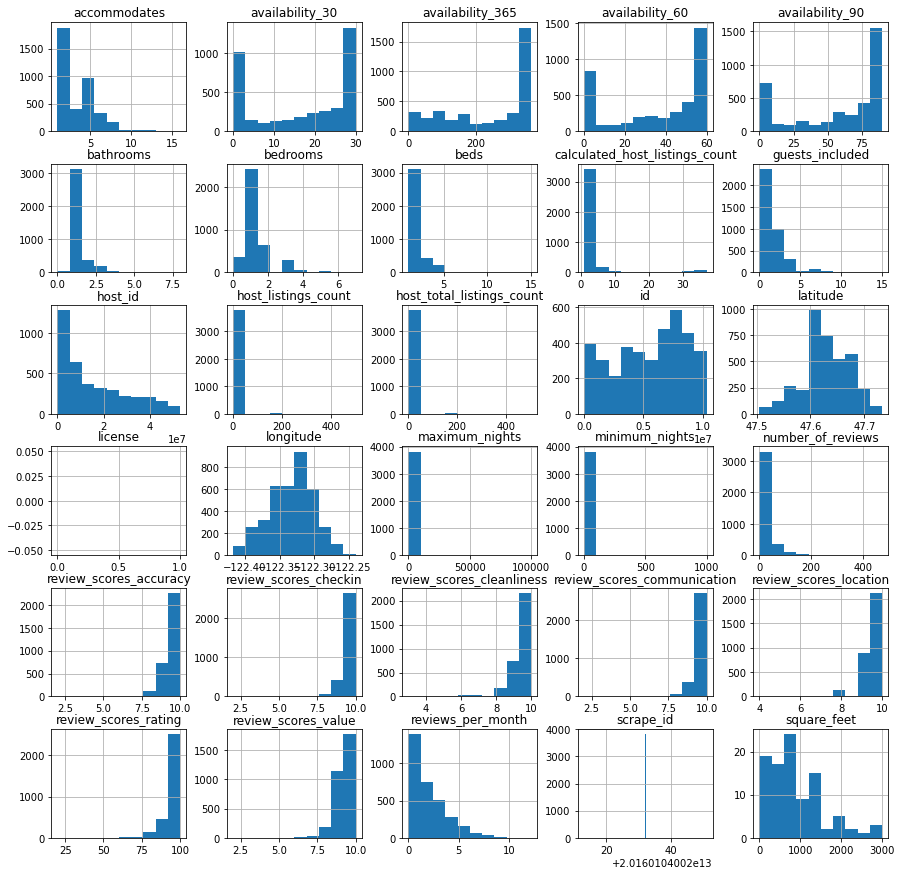

In [17]:
listings.hist();

#### ・Observing the listings data
It seems that there are many usuful data for analylsis.
<br>
<br>

### Preparation data<br>
reviews = reviews.csv : The comment data may be useful, but I won't use it in this analysis.<br>
calendar = calendar.csv: The price data seems to be useful, but it's included in the listing data, so I won't use it this time.<br>
listings = listings.csv: Since there seems to be data that may be useful for analysis, we will use some columns from this.<br>
<br>

I will forcus on "review_scores_rating" column. I would like to find an item that has a strong correlation with that column.

I pick the rows that are likely to help me to be a good owner or make a good accormodation.

"host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_neighbourhood", "host_verifications", "host_has_profile_pic","host_identity_verified", "property_type","room_type","accommodates","bathrooms", "bedrooms", "beds", "bed_type","amenities", "price", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "guests_included", "extra_people", "minimum_nights", "maximum_nights", "cancellation_policy"

In [18]:
print(listings.select_dtypes(include="float"))

      host_listings_count  host_total_listings_count   latitude   longitude  \
0                     3.0                        3.0  47.636289 -122.371025   
1                     6.0                        6.0  47.639123 -122.365666   
2                     2.0                        2.0  47.629724 -122.369483   
3                     1.0                        1.0  47.638473 -122.369279   
4                     2.0                        2.0  47.632918 -122.372471   
...                   ...                        ...        ...         ...   
3813                354.0                      354.0  47.664295 -122.359170   
3814                  1.0                        1.0  47.649552 -122.318309   
3815                  1.0                        1.0  47.508453 -122.240607   
3816                  1.0                        1.0  47.632335 -122.275530   
3817                  1.0                        1.0  47.641186 -122.342085   

      bathrooms  bedrooms  beds  square_feet  revie

In [19]:
print(listings.select_dtypes(include="int64"))

            id       scrape_id   host_id  accommodates  guests_included  \
0       241032  20160104002432    956883             4                2   
1       953595  20160104002432   5177328             4                1   
2      3308979  20160104002432  16708587            11               10   
3      7421966  20160104002432   9851441             3                1   
4       278830  20160104002432   1452570             6                6   
...        ...             ...       ...           ...              ...   
3813   8101950  20160104002432  31148752             6                1   
3814   8902327  20160104002432  46566046             4                3   
3815  10267360  20160104002432  52791370             2                2   
3816   9604740  20160104002432  25522052             2                1   
3817  10208623  20160104002432  14703116             3                1   

      minimum_nights  maximum_nights  availability_30  availability_60  \
0                  1     

In [20]:
listings_1 = listings[["review_scores_rating","bathrooms","bedrooms","beds","accommodates","guests_included","minimum_nights","maximum_nights"]]
listings_1

,review_scores_rating,bathrooms,bedrooms,beds,accommodates,guests_included,minimum_nights,maximum_nights
0,95.0,1.0,1.0,1.0,4,2,1,365
1,96.0,1.0,1.0,1.0,4,1,2,90
2,97.0,4.5,5.0,7.0,11,10,4,30
3,NaN,1.0,0.0,2.0,3,1,1,1125
4,92.0,2.0,3.0,3.0,6,6,1,1125
...,...,...,...,...,...,...,...,...
3813,80.0,2.0,3.0,3.0,6,1,3,1125
3814,100.0,1.0,1.0,2.0,4,3,2,29
3815,NaN,1.0,1.0,1.0,2,2,1,7
3816,NaN,1.0,0.0,1.0,2,1,3,1125


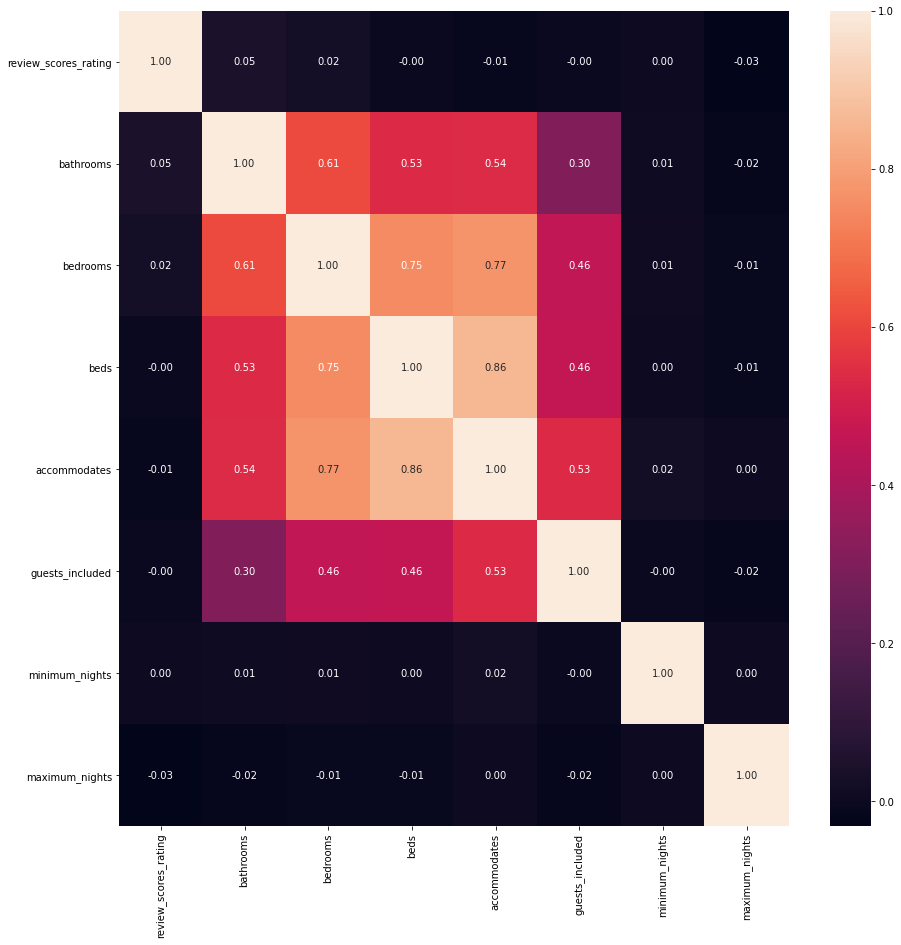

In [21]:
sns.heatmap(listings_1.corr(), annot=True, fmt=".2f");

In [22]:
listings_2 = listings[["review_scores_rating","host_response_time","host_response_rate","host_is_superhost","host_neighbourhood","host_verifications","host_has_profile_pic","host_identity_verified","property_type","room_type","bed_type","amenities","price","weekly_price","monthly_price", "security_deposit", "cleaning_fee", "guests_included", "extra_people", "cancellation_policy", "neighbourhood" ]]

In [23]:
listings_2['review_scores_rating'].isnull().mean() # missing values

0.16946045049764275

In [24]:
host_response_time = listings_2.groupby(['host_response_time']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(host_response_time)
host_response_rate = listings_2.groupby(['host_response_rate']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(host_response_rate)
host_is_superhost = listings_2.groupby(['host_is_superhost']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(host_is_superhost)
host_neighbourhood = listings_2.groupby(['host_neighbourhood']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(host_neighbourhood)
host_verifications = listings_2.groupby(['host_verifications']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(host_verifications)
host_has_profile_pic = listings_2.groupby(['host_has_profile_pic']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(host_has_profile_pic)
host_identity_verified = listings_2.groupby(['host_identity_verified']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(host_identity_verified)
property_type = listings_2.groupby(['property_type']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(property_type)
room_type = listings_2.groupby(['room_type']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(room_type)
bed_type = listings_2.groupby(['bed_type']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(bed_type)
price = listings_2.groupby(['price']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(price)
weekly_price = listings_2.groupby(['weekly_price']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(weekly_price)
monthly_price = listings_2.groupby(['monthly_price']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(monthly_price)
cleaning_fee = listings_2.groupby(['cleaning_fee']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(cleaning_fee)
guests_included = listings_2.groupby(['guests_included']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(guests_included)
extra_people = listings_2.groupby(['extra_people']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(extra_people)
cancellation_policy = listings_2.groupby(['cancellation_policy']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(cancellation_policy)
neighbourhood = listings_2.groupby(['neighbourhood']).mean()['review_scores_rating'].sort_values(ascending=False).dropna()
print(neighbourhood)

host_response_time
within an hour        95.143984
within a day          94.264831
within a few hours    93.812425
a few days or more    87.793103
Name: review_scores_rating, dtype: float64
host_response_rate
56%     100.000000
17%     100.000000
65%     100.000000
30%     100.000000
38%     100.000000
95%      97.857143
25%      97.500000
31%      97.000000
91%      96.000000
63%      95.777778
76%      95.333333
100%     95.277885
83%      94.750000
60%      94.588235
75%      94.413793
78%      94.333333
50%      94.257143
94%      94.195122
81%      94.000000
53%      94.000000
93%      93.941176
98%      93.678571
88%      93.529412
90%      93.527027
87%      93.333333
67%      93.129032
86%      92.703704
82%      92.500000
89%      92.448276
99%      92.306452
96%      92.058824
58%      92.000000
92%      92.000000
64%      91.666667
97%      91.000000
70%      90.954545
33%      90.818182
80%      88.870968
43%      85.750000
71%      85.250000
69%      85.000000
57%      81.

In [25]:
import locale
import pandas as pd
locale.setlocale(locale.LC_ALL,'')
listings_2['price']=listings_2.price.map(lambda x: locale.atof(x.strip('$')))

C:\Users\ironb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
listings_2

,review_scores_rating,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,property_type,room_type,...,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,cancellation_policy,neighbourhood
0,95.0,within a few hours,96%,f,Queen Anne,"['email', 'phone', 'reviews', 'kba']",t,t,Apartment,Entire home/apt,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,NaN,NaN,NaN,2,$5.00,moderate,Queen Anne
1,96.0,within an hour,98%,t,Queen Anne,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Apartment,Entire home/apt,...,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,strict,Queen Anne
2,97.0,within a few hours,67%,f,Queen Anne,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,House,Entire home/apt,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,NaN,NaN,"$1,000.00",$300.00,10,$25.00,strict,Queen Anne
3,NaN,NaN,NaN,f,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Apartment,Entire home/apt,...,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,$650.00,"$2,300.00",NaN,NaN,1,$0.00,flexible,Queen Anne
4,92.0,within an hour,100%,f,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,House,Entire home/apt,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,NaN,NaN,$700.00,$125.00,6,$15.00,strict,Queen Anne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,80.0,within a few hours,99%,f,Holly,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,t,House,Entire home/apt,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",359.0,NaN,NaN,NaN,$230.00,1,$0.00,strict,Fremont
3814,100.0,within an hour,100%,f,Portage Bay,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Apartment,Entire home/apt,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",79.0,NaN,NaN,$500.00,$50.00,3,$25.00,moderate,Portage Bay
3815,NaN,NaN,NaN,f,NaN,['phone'],t,f,House,Entire home/apt,...,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",93.0,$450.00,NaN,$250.00,$35.00,2,$20.00,moderate,NaN
3816,NaN,within an hour,100%,f,NaN,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Condominium,Entire home/apt,...,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",99.0,NaN,NaN,$300.00,$45.00,1,$0.00,moderate,NaN


In [27]:
listings_2['review_scores_rating'] = listings_2['review_scores_rating'].fillna(listings_2['review_scores_rating'].mean())

C:\Users\ironb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
X = listings_2.loc[:,['review_scores_rating']].values
y = listings_2.loc[:,['price']].values

In [29]:
X

array([[95.        ],
       [96.        ],
       [97.        ],
       ...,
       [94.53926206],
       [94.53926206],
       [94.53926206]])

In [30]:
linear = LinearRegression()
linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(linear.coef_)
print(linear.intercept_)

[[0.7568793]]
[56.42135488]


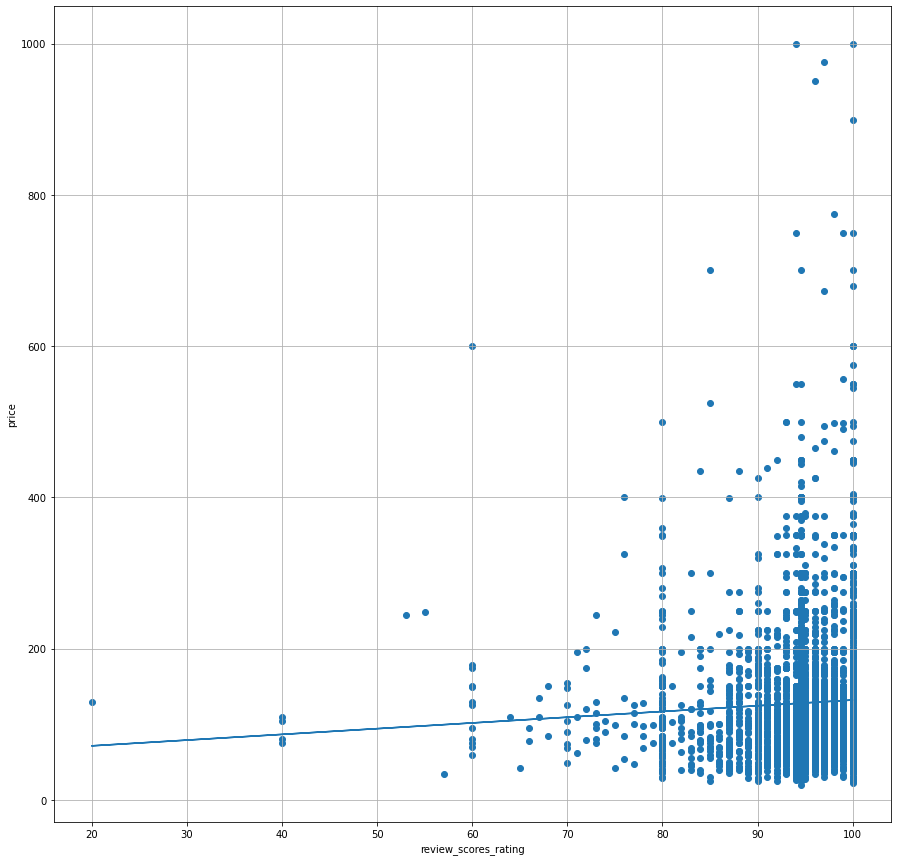

In [32]:
plt.scatter(X, y)
plt.xlabel('review_scores_rating')
plt.ylabel('price')

plt.plot(X, linear.predict(X))
plt.grid(True)

In [33]:
print(linear.score(X, y))

0.0025490819685033417
